In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [28]:
def coin(bias=0.5):
    if not (0 <= bias <= 1):
        raise ValueError("Bias must be between 0 and 1")
    return 1 if random.random() < bias else 0

n = 100
p = np.array([coin(bias=0.5) for _ in range(n)])
q = np.array([coin(bias=0.5) for _ in range(n)])

# Entropy method

In [29]:
def entropy(x):
    x = np.array([np.mean(x), 1 - np.mean(x)])
    x = np.clip(x, 1e-10, 1 - 1e-10) 
    return -np.sum(x * np.log2(x))

hp = entropy(p)
hq = entropy(q)
print(hp)
print(hq)

0.9974015885677396
0.9997114417528099


In [30]:
def cross_entropy(p, q):
    p = np.array([np.mean(p), 1 - np.mean(p)])
    q = np.array([np.mean(q), 1 - np.mean(q)])
    p = np.clip(p, 1e-10, 1 - 1e-10) 
    q = np.clip(q, 1e-10, 1 - 1e-10) 
    return -np.sum(p * np.log2(q))

hpq = cross_entropy(p, q)
print(hpq)

0.9985571317956841


In [31]:
kl = hpq - hp
print(kl)

0.0011555432279444222


# Likelihood method

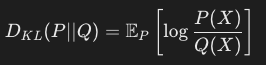  
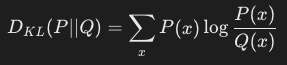

In [32]:
def ll_ratio(p, q):
    p = np.array([np.mean(p), 1 - np.mean(p)])
    q = np.array([np.mean(q), 1 - np.mean(q)])
    return np.log(p / q)

ll = ll_ratio(p, q)
print(ll)

[ 0.03846628 -0.0416727 ]


In [34]:
kl = np.mean(p) * ll[0] + (1 - np.mean(p)) * ll[1]
print(kl) 

0.000800961530464963


# Forward KL vs Reverse KL

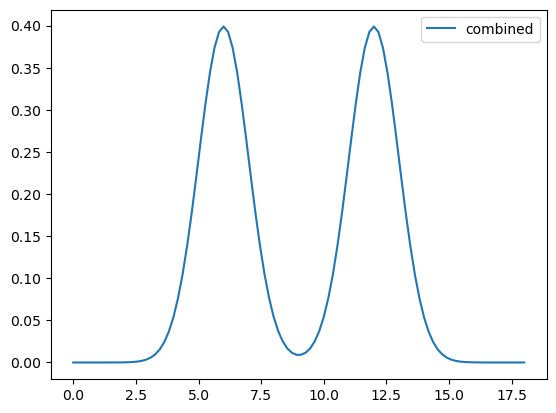

In [24]:
# sample a gaussian data with two mean and variance and plot it
mu1 = 6
mu2 = 12
sigma = 1
x = np.linspace(0, 18, 100)
x1 = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu1) / sigma) ** 2)
x2 = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu2) / sigma) ** 2)

# Combine x1 and x2 into one continuous dataset
combined_data = x1 + x2

plt.plot(x, combined_data, label='combined')
plt.legend()
plt.show()


In [26]:
# forward KL
def kl_divergence(p, q):
    return np.sum(p * np.log(p / q))

forward_kl = kl_divergence(x1, x2)
print(forward_kl)

# reverse KL
reverse_kl = kl_divergence(x2, x1)
print(reverse_kl)

99.04234155991182
-0.02117086140722587


# KL Approximation

http://joschu.net/blog/kl-approx.html

In [ ]:
import torch.distributions as dis
p = dis.Normal(loc=0, scale=1)
q = dis.Normal(loc=0.1, scale=1)
x = q.sample(sample_shape=(10_000_000,))
truekl = dis.kl_divergence(p, q)
print("true", truekl)
logr = p.log_prob(x) - q.log_prob(x)
k1 = -logr
k2 = logr ** 2 / 2
k3 = (logr.exp() - 1) - logr
for k in (k1, k2, k3):
    print((k.mean() - truekl) / truekl, k.std() / truekl)